# 30Music Dataset Statistics

Common statistics for [30Music dataset](http://crowdrec.eu/2015/11/30music-dataset-release/).

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/30music'

### Albums

In [3]:
falbums = os.path.join(data_dir, 'albums.csv')

In [4]:
albums = pd.read_csv(falbums, index_col='ID', sep=';')

In [5]:
print(albums.shape[0])
print('#albums:', albums.index.unique().shape[0])
albums.head()

217337
#albums: 217337


,MBID,Title
ID,,
0,81a775f4-4a0e-401f-b167-f8dd97453193,Mutazione: Italian Electronic & New Wave Under...
1,189bd32e-65ec-46d6-b939-6e4988ac6872,"Like What, Me Worry / Why Can't I Say"
2,8cc6207e-cfc2-40d9-a564-0d64aed50b0d,009 Sound System
3,38d1a53d-ed44-4924-b1b8-bd1504e61e6c,Angels & Demons
4,442444dc-b87a-4084-b049-e6015b1ba343,Running / Reflux


### Artists

In [6]:
fartists = os.path.join(data_dir, 'persons.csv')

In [7]:
artists = pd.read_csv(fartists, index_col='ID', sep=';')

In [8]:
print(artists.shape[0])
print('#artists:', artists.index.unique().shape[0])
artists.head()

560927
#artists: 560927


,MBID,Name
ID,,
145148,NaN,Everything+Is+Illuminated
297899,NaN,Robin+O%27Brien
250429,NaN,Nicholas+Gunn++(2012)
32765,NaN,Aspasia+Stratigou
18689,NaN,Allison+Veltz


### Users

In [9]:
fusers = os.path.join(data_dir, 'users.csv')

In [10]:
users = pd.read_csv(fusers, index_col='ID', sep=';')

In [11]:
print(users.shape[0])
print('#users:', users.index.unique().shape[0])
users.head()

45167
#users: 45167


,Timestamp,#Playlists,Age,Country,Gender,Playcount,Subscribertype,Username
ID,,,,,,,,
1,1116715959,2,24.0,US,F,221012,base,000123
2,1163123792,9,39.0,CZ,M,217535,base,000333
3,1184426573,2,NaN,NaN,F,49733,base,00elen
4,1123157597,2,32.0,DE,M,168054,base,00Eraser00
5,1171302116,2,23.0,UK,M,45700,base,00fieldsy


### Tags

In [12]:
ftags = os.path.join(data_dir, 'tags.csv')

In [13]:
tags = pd.read_csv(ftags, index_col='ID', sep=';')

In [14]:
print(tags.shape[0])
print('#tags:', tags.index.unique().shape[0])
tags.head()

276618
#tags: 276618


,URL,Value
ID,,
152244,www.last.fm/tag/m-dibango,m-dibango
58983,www.last.fm/tag/demonios%20da%20garoa,demonios da garoa
263526,www.last.fm/tag/violon-celle,violon-celle
197824,www.last.fm/tag/radio%20critical%20rachel,radio critical rachel
75705,www.last.fm/tag/eurovision%201957,eurovision 1957


### Tracks / Songs

In [15]:
ftracks = os.path.join(data_dir, 'tracks.csv')

In [16]:
tracks = pd.read_csv(ftracks, sep=';', keep_default_na=False)

/home/dawei/apps/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
tracks.set_index('ID', inplace=True)

In [18]:
print(tracks.shape[0])
print('#tracks:', tracks.index.unique().shape[0])
tracks.head()

4519105
#tracks: 4519105


,Duration,Playcount,MBID,Name,ArtistsID,AlbumsID,TagsID
ID,,,,,,,
0,-1,4,,000003+Music+Instructor/_/Dj%27s+Rock+Da+House...,0,,
1,-1,495,,00-01/_/%D0%A2%D0%B5%D0%BA%D1%81%D1%82,1,,
2,-1,2,,0005.+Overkill/_/Overkill,2,,
3,-1,2,,000C+Tony+Dize/_/Ruleta+Rusa,3,,
4,-1,1,,000+Oscarcito/_/Tumbay%E2%80%9A+(Lyrics),4,,


### Playlist

In [19]:
fplaylist = os.path.join(data_dir, 'playlist.csv')

In [20]:
playlist = pd.read_csv(fplaylist, index_col='ID', sep=';')

In [21]:
playlist.head()

,Timestamp,Title,#Tracks,Duration,UserID,TracksID
ID,,,,,,
2973549,1216545588,my_favorites,27,6522,41504,"3006631,1885124,2548942,1350486,3734368,355901..."
5429703,1249326867,NaN,9,2650,41504,"2807573,2807606,1119655,1378148,805788,2944005..."
5926742,1257766688,1989,16,3645,44542,"2236990,3005440,2941671,3004987,2834239,298436..."
5353183,1248079275,Fly me to the moon...,15,4151,44542,"2338780,1813232,199079,3295925,1175085,3452508..."
330569,1175201268,The playlist who must not be named,84,18414,44542,"1632714,2933827,1632721,2533642,2652489,353378..."


Filtering out playlists without tracks data.

In [22]:
#playlist[playlist['TracksID'].isin([np.nan])].head()
playlist[playlist['TracksID'].isnull()].head()

,Timestamp,Title,#Tracks,Duration,UserID,TracksID
ID,,,,,,
136481,1172149901,-kamyk-'s playlist,89,30451,43704,NaN
8603774,1305954247,favorites,11,2572,40433,NaN
5484436,1250243469,Untitled,8,1382,44636,NaN
4719071,1238569157,Untitled,4,1435,40874,NaN
731052,1182008126,NaN,4,1435,44459,NaN


In [23]:
playlist[playlist['TracksID'].notnull()].shape

(48422, 6)

In [24]:
playlist = playlist[playlist['TracksID'].notnull()]
print(playlist.shape[0])
print('#playlist:', playlist.index.unique().shape[0])

48422
#playlist: 48422


Histogram of playlist length (i.e., the number of tracks/songs).

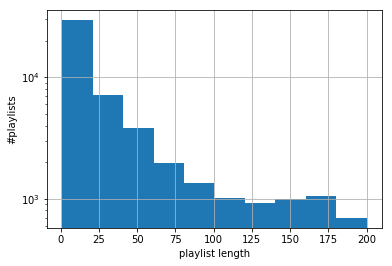

In [25]:
ax = plt.subplot(111)
playlist['#Tracks'].hist(ax=ax)
ax.set_xlabel('playlist length')
ax.set_ylabel('#playlists')
ax.set_yscale('log')

In [26]:
playlist['#Tracks'].describe()

count    48422.000000
mean        33.105613
std         43.731792
min          1.000000
25%          6.000000
50%         15.000000
75%         40.000000
max        200.000000
Name: #Tracks, dtype: float64

In [27]:
playlist['#Tracks'].median()

15.0

The number of users that created playlists.

In [28]:
nusers = playlist['UserID'].unique().shape[0]
nusers

15102

Average number of playlists for each user.

In [29]:
playlist.shape[0] / nusers

3.206330287379155

#### Check multiple ground truth

Assume query is:
- `query = (start_song, length)`
- `query = (start_song, length, user)`

In [30]:
query_dict1 = dict()
query_dict2 = dict()

In [31]:
for ix in playlist.index:
    uid = playlist.loc[ix, 'UserID']
    tracks = [int(x) for x in str(playlist.loc[ix, 'TracksID']).split(',')]
    ntracks = len(tracks)
    q1 = (tracks[0], ntracks)
    q2 = (tracks[0], ntracks, uid)
    try:
        query_dict1[q1].append(ix)
    except KeyError:
        query_dict1[q1] = [ix]
    try:
        query_dict2[q2].append(ix)
    except KeyError:
        query_dict2[q2] = [ix]

queries with multiple ground truths.

In [32]:
queries1 = sorted([q1 for q1 in query_dict1 if len(query_dict1[q1]) > 1])

In [33]:
print('query = (start_song, length)')
print('#Queries with multiple ground truth: %d, ratio: %.2f%%' % (len(queries1), 100*len(queries1) / len(query_dict1)))

query = (start_song, length)
#Queries with multiple ground truth: 551, ratio: 1.15%


In [34]:
queries2 = sorted([q2 for q2 in query_dict2 if len(query_dict2[q2]) > 1])

In [35]:
print('query = (start_song, length, user)')
print('#Queries with multiple ground truth: %d, ratio: %.2f%%' % (len(queries2), 100*len(queries2) / len(query_dict2)))

query = (start_song, length, user)
#Queries with multiple ground truth: 47, ratio: 0.10%


### User preference

In [36]:
fpref = os.path.join(data_dir, 'love.csv')

In [37]:
pref = pd.read_csv(fpref, sep=';')

In [38]:
print('#likes:', pref.shape[0])
pref.head()

#likes: 4106341


,UserID,TrackID
0,44542,2785601
1,44542,2785590
2,44542,143076
3,44542,143037
4,44542,143052
